In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [24]:
population_width = 100
t_iterations = 30
lmbd = 0.7
c = 0.7
a = 1
initial_p = np.log(lmbd) / a + .3
initial_h = (lmbd * np.log(lmbd)) / ( (lmbd-1) * a * c ) + .3

dh = .9
dp = .7

In [25]:
parasites = []
hosts = []
parasites.append(
    np.random.rand(population_width, population_width)
)
hosts.append(
    np.random.rand(population_width, population_width)
)

In [26]:
def H_next(t):

    p_star = H_star(t)
    exp = np.exp(-a * P_star(t))
    next_H = lmbd * p_star * np.exp(-a * P_star(t))
    hosts.append(next_H)
    print("p star ", np.min(p_star))
    print(np.max(next_H), " exp ", np.max(exp))

def P_next(t):

    h_star = H_star(t)
    
    next_P = c * h_star * (1 - np.exp(-a * P_star(t)))
    parasites.append(next_P)
    print("P max", np.max(next_P))

def H_star(t):

    kernel_sum_mat = np.zeros_like(hosts[0])
    return (1 - dh) * hosts[t-1] + (dh) * kernel_sum(hosts[t-1], kernel_sum_mat) / 8.

def P_star(t):

    kernel_sum_mat = np.zeros_like(parasites[0])
    return (1 - dp) * parasites[t-1] + (dp/8.) * kernel_sum(parasites[t-1], kernel_sum_mat)
    

In [27]:
def kernel_sum(mat, res):

    mat_width = mat.shape[0] # both dims are equal

    for i in range(0, mat.shape[0]):
        for j in range(0, mat.shape[1]):

            for w in range(-1, 2):
                for h in range(-1 ,2):

                    coord_i = (i + w + mat_width) % mat_width
                    coord_j = (j + h + mat_width) % mat_width
                    res[i][j] += mat[coord_i][coord_j]

    return res



In [28]:
saved_hosts_dists = []
saved_parasites_dists = []

In [29]:
for it in range(1, t_iterations+1):

    print("Iteration ", it)
    if(it % 10 == 1):

        saved_hosts_dists.append(hosts[it-1])
        saved_parasites_dists.append(parasites[it-1])

    H_next(it)
    P_next(it)

Iteration  1
p star  0.16852718222387392
0.4952581874640163  exp  0.8506580230736795
P max 0.330140819144838
Iteration  2
p star  0.1117710297032428
0.2599021477923175  exp  0.9371691299967545
P max 0.05945553353555494
Iteration  3
p star  0.09149097406038943
0.1705241227291389  exp  0.9903105525868333
P max 0.00958396740052521
Iteration  4
p star  0.07687085712144126
0.12439582423335344  exp  0.9991275728643263
P max 0.0011791840169504133
Iteration  5
p star  0.06373643653750986
0.09334984705547353  exp  0.9999349528948965
P max 0.00010820407257979997
Iteration  6
p star  0.05202784037487046
0.07064334748302593  exp  0.9999959593972653
P max 7.509659255797106e-06
Iteration  7
p star  0.04203144722624556
0.05372260022276654  exp  0.9999997956036661
P max 3.969467591975124e-07
Iteration  8
p star  0.03370596922943713
0.041004448914970675  exp  0.9999999917096949
P max 1.6056238331405474e-08
Iteration  9
p star  0.026885444410677452
0.03138592842414526  exp  0.9999999997416806
P max 4.98

<class 'numpy.ndarray'>
saved range  6.369943730488714e-06 0.9999184029194348
<class 'numpy.ndarray'>
saved range  0.014951508004713466 0.024090680895146144
<class 'numpy.ndarray'>
saved range  0.0013558821701050636 0.001832698887522056


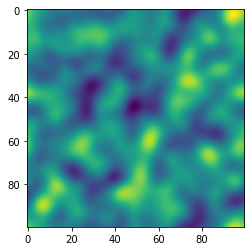

In [30]:
for saved in saved_hosts_dists:

    print(type(saved))
    print("saved range ", np.min(saved), np.max(saved))
    plt.imshow(saved)

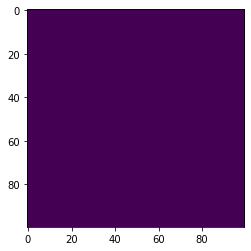

In [23]:
for parasite_dist in saved_parasites_dists:

    plt.imshow(parasite_dist)